## Project: A/B TEST FOR THE BIG ONLINE STORE

<strong>Goals:</strong> 1. to prioritize the hypotheses from the list, compiled by the marketing department of the big online store. 2. to launch an A/B  test for one of the hypotheses and to analyze the results.


* [I. Prioritizing Hypotheses](#chapter1)
    * [ICE Scoring](#section_1_1)
    * [RICE Scoring](#section_1_2)
* [II A/B Test Analysis](#chapter2)
    * [Data preparation](#section_2_1)
    * [Analysis of the A/B test](#section_2_2)
        * [Cumulative revenue by group](#section_2_2_1)
        * [Cumulative average order size by group](#section_2_2_2)
        * [Relative difference in cumulative average order size](#section_2_2_3)
        * [Each group's conversion rate](#section_2_2_4)
        * [Number of orders per user](#section_2_2_5)
        * [95th and 99th percentiles for the number of orders per user](#section_2_2_6)
        * [Order prices](#section_2_2_7)
        * [95th and 99th percentiles of order prices](#section_2_2_8)
        * [Statistical significance of the difference in conversion (raw data)](#section_2_2_9)
        * [Statistical significance of the difference in average order size (raw data)](#section_2_2_10)
        * [Statistical significance of the difference in conversion (filtered data)](#section_2_2_11)
        * [Statistical significance of the difference in average order size (filtered data)](#section_2_2_12)
* [CONCLUSION](#chapter3)


### I. Prioritizing Hypotheses  <a class="anchor" id="chapter1"></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime as dt
import numpy as np
import seaborn as sns



hypotheses= pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
display(hypotheses.info())
hypotheses.columns = hypotheses.columns.str.lower()


display(hypotheses)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Effort        9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; border-style: dotted solid; vertical-align: middle; padding:20px 10px;">
The data on hypotheses, which is originally represented as a semicolon separated list, was converted to the table. There is not null values and duplicates. 
</div>

### ICE prioritization  <a class="anchor" id="section_1_1"></a>

In [3]:
hypotheses['ICE'] = (hypotheses['impact'] * hypotheses['confidence'])/hypotheses['effort']
print(hypotheses[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

                                          hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


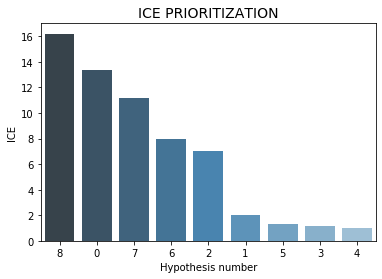

In [4]:

fig, ax = plt.subplots()
ax = sns.barplot(x="hypothesis", y="ICE", data=hypotheses.sort_values(by='ICE', ascending=False),
                 palette="Blues_d")
ax.set_xticklabels(hypotheses.sort_values(by='ICE', ascending=False).index)
plt.xlabel("Hypothesis number")
plt.ylabel("ICE")
plt.title("ICE PRIORITIZATION", size=14)
plt.show()

<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; border-style: dotted solid; vertical-align: middle; padding:20px 10px;">
According to the ICE prioritization, the hypotheses 8, 0, 7 are of the first priority to be tested.
</div>

### RICE prioritization  <a class="anchor" id="section_1_2"></a>

In [5]:
hypotheses['RICE'] = (hypotheses['reach']*hypotheses['impact'] * hypotheses['confidence'])/hypotheses['effort']
print(hypotheses[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                          hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


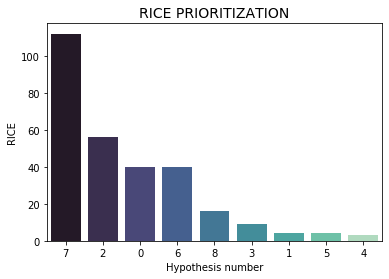

In [6]:
fig, ax = plt.subplots()
ax = sns.barplot(x="hypothesis", y="RICE", data=hypotheses.sort_values(by='RICE', ascending=False),
                 palette="mako")
ax.set_xticklabels(hypotheses.sort_values(by='RICE', ascending=False).index)
plt.xlabel("Hypothesis number")
plt.ylabel("RICE")
plt.title("RICE PRIORITIZATION", size=14)
plt.show()

<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; border-style: dotted solid; vertical-align: middle; padding:20px 10px;">
According to the RICE prioritization, the hypotheses 7, 2, 0 are of the first priority to be tested.
</div>

<strong>Explanation of the differences in results</strong>
<p>One may notice that the lists of first priority hypotheses are different within ICE and RICE framework. The reason for these changres is that we have "REACH" parameter in RICE calculation which effects the results.</p>
<p>Let's look at the 8th hypothesis which got the highest priority according to the ICE framework, but suprisingly got the 5th place in RICE priority list. The reason is that the the reach parameter of the 8th hypothesis was rated as 1 (that is the lowest value within the scale). In other words, while the the hypothesis is significant in terms of its impact,  the number of users which will be affected by the update, is extremely low. The 2nd hypothesis, for, on the contrary, got 8 out of 10 that helped it to rise in the priority ranking from the 5th to the 2nd place.</p>

## II A/B Test Analysis

### Data preparation <a class="anchor" id="section_2_1"></a>

In [7]:
orders= pd.read_csv('/datasets/orders_us.csv')
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
display(orders.head())
display(orders.info())



,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null float64
group            1197 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


None

<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; border-style: dotted solid; vertical-align: middle; padding:20px 10px;">
There is not null values in the dataFrame. The column "date" was converted to datetime64 format.
</div>

In [8]:
orders_users_groups = orders.groupby('visitorId')['group'].nunique().reset_index()

users_in_two_groups = orders_users_groups[orders_users_groups['group'] == 2]
user_list_A_B = users_in_two_groups['visitorId'].tolist()
print('There are {} users who were assigned to both A and B groups'.format(len(users_in_two_groups)))
orders['two_groups'] = False
for i in orders.index:
    user = orders.loc[i, 'visitorId']
    if user in user_list_A_B:
        orders.loc[i,'two_groups'] = True
    
orders = orders[orders['two_groups'] == False]



There are 58 users who were assigned to both A and B groups


<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; border-style: dotted solid; vertical-align: middle; padding:20px 10px;">
There are 58 users who were assigned to both A and B groups. The rows related to these users were deleted from the orders table for the higher accuracy of the A/B test.
</div>

In [9]:
visits= pd.read_csv('/datasets/visits_us.csv')
visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

display(visits.head())
display(visits.info())


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date      62 non-null datetime64[ns]
group     62 non-null object
visits    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; border-style: dotted solid; vertical-align: middle; padding:20px 10px;">
There is no null values in the dataFrame. The column "date" was converted to datetime64 format.It is significant to mention that it was impossible to delete the visits (from the total count) of the users who were assigned to both groups. 
</div>

### Analysis of the A/B test <a class="anchor" id="section_2_2"></a>

#### Task 1: Graph cumulative revenue by group.  <a class="anchor" id="section_2_2_1"></a>


In [10]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

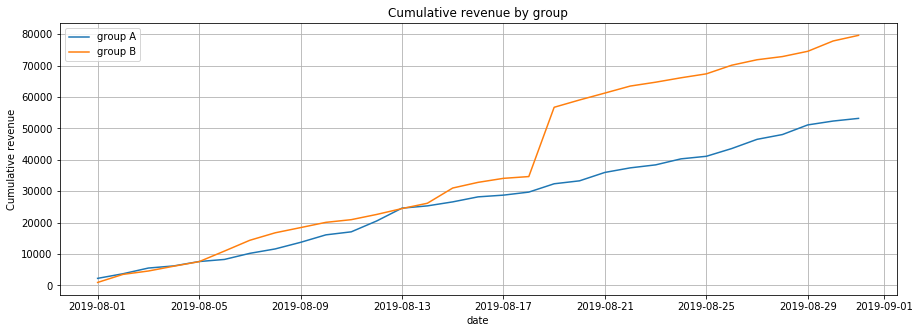

In [11]:
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(
lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']


cumulativeDataA = cumulativeData[cumulativeData['group']=='A'][['date', 'revenue']]
cumulativeDataB = cumulativeData[cumulativeData['group']=='B'][['date', 'revenue']]

plt.figure(figsize=(15,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['revenue'], label="group A")
plt.plot(cumulativeDataB['date'], cumulativeDataB['revenue'], label="group B")
plt.title('Cumulative revenue by group')
plt.xlabel('date')
plt.ylabel('Cumulative revenue')
plt.grid(True)
plt.legend()
plt.show()

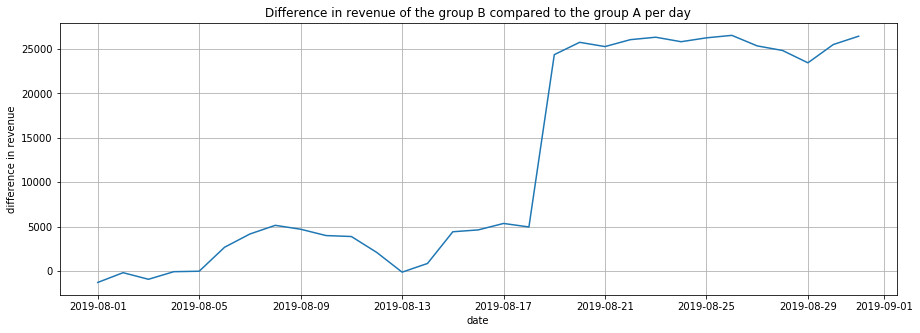

In [12]:
revenue_per_day = cumulativeDataA[['date', 'revenue']]
difference_in_revenue_per_day = revenue_per_day.merge(cumulativeDataB[['date', 'revenue']], how='left', on='date')
difference_in_revenue_per_day['difference'] = difference_in_revenue_per_day['revenue_y'] - difference_in_revenue_per_day['revenue_x']
plt.figure(figsize=(15,5))
plt.plot(difference_in_revenue_per_day['date'], difference_in_revenue_per_day['difference'])
plt.title('Difference in revenue of the group B compared to the group A per day')
plt.xlabel('date')
plt.ylabel('difference in revenue')
plt.grid(True)
plt.show()


<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; border-style: dotted solid; vertical-align: middle; padding:20px 10px;">
One may notice the significant difference in cumulative revenues in the two groups after August 18th - the group B demostrates the sharp rise in revenue while the revenue of the group A continues to increase gradually at the same pace. By the end of the test the difference reaches the value more than 25000. The dramatic jump in revenues in group B can be connected or with the growth of the number of orders or with the rise of the average order size.
</div>

#### Task 2: Graph cumulative average order size by group. <a class="anchor" id="section_2_2_2"></a>

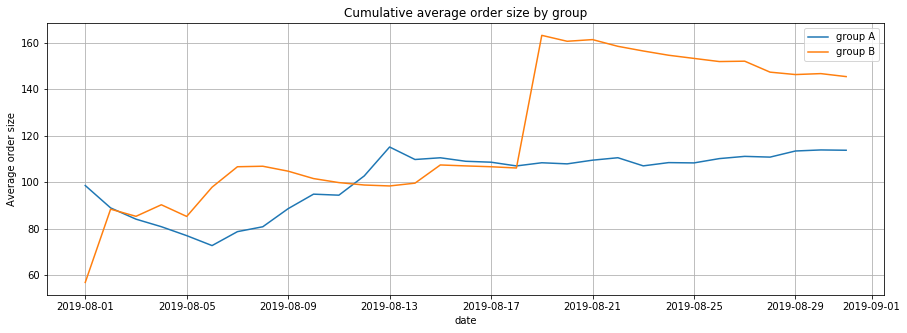

In [13]:
cumulative_order_size_A = cumulativeData[cumulativeData['group']=='A'][['date', 'orders', 'revenue']]
cumulative_order_size_B = cumulativeData[cumulativeData['group']=='B'][['date', 'orders', 'revenue']]

plt.figure(figsize=(15,5))
plt.plot(cumulative_order_size_A['date'], cumulative_order_size_A['revenue']/cumulative_order_size_A['orders'], label="group A")
plt.plot(cumulative_order_size_B['date'], cumulative_order_size_B['revenue']/cumulative_order_size_B['orders'], label="group B")
plt.title('Cumulative average order size by group')
plt.xlabel('date')
plt.ylabel('Average order size')
plt.grid(True)

plt.legend()
plt.show()

<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; border-style: dotted solid; vertical-align: middle; padding:20px 10px;">
Similarly to the previous graph, one may notice a rapid increase in cumulative average order size in the group B starting on around August 18th. Comparing the current results with the previous one one may conclude that the increase of revenues starting from August 18th is correlated directly with the rise of average order size</div>

#### Graph the relative difference in cumulative average order size for group B compared with group A.  <a class="anchor" id="section_2_2_3"></a>

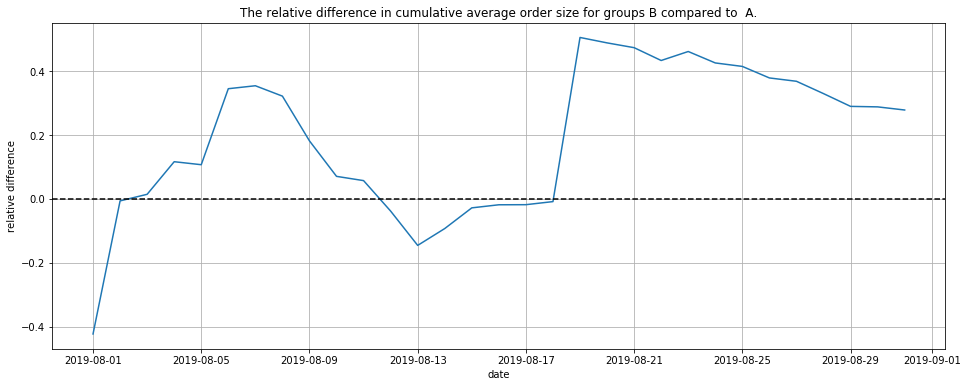

In [14]:
cumulative_order_size_A_B = cumulative_order_size_A.merge(cumulative_order_size_B, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(16,6))
plt.plot(cumulative_order_size_A_B['date'], (cumulative_order_size_A_B['revenueB']/cumulative_order_size_A_B['ordersB'])/(cumulative_order_size_A_B['revenueA']/cumulative_order_size_A_B['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('The relative difference in cumulative average order size for groups B compared to  A.')
plt.xlabel('date')
plt.ylabel('relative difference')
plt.grid(True)
plt.show()

<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; border-style: dotted solid; vertical-align: middle; padding:20px 10px;">
The current graph demonstrates the dynamics of the change in average order size for the Group B: in the beginning the order size increases rapidly till August 7th and then it begins to decline till August 13th (on August 13th the average order size in the Group B fell lower than the average order size in the Group A). Afterwards, the order size in the Group B starts to increase and on August 18th becomes equal to the order size in the group A. Similarly to the previous results, the average orders size in the group B increases rapidly compared to to the group A and after that it starts to decrease slightly.  
</div>

#### Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. <a class="anchor" id="section_2_2_4"></a>

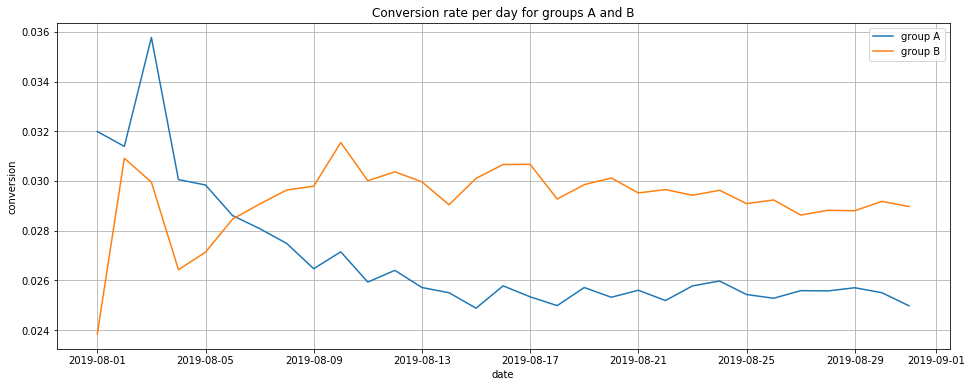

In [15]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.figure(figsize=(16,6))
plt.plot(cumulativeDataA['date'],cumulativeDataA['conversion'], label='group A')
plt.plot(cumulativeDataB['date'],cumulativeDataB['conversion'], label='group B')
plt.xlabel('date')
plt.ylabel('conversion')
plt.title('Conversion rate per day for groups A and B')
plt.grid(True)

plt.legend()
plt.show()

<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; border-style: dotted solid; vertical-align: middle; padding:20px 10px;">
One may notice that the dynamics per day for the conversion rate differ starting from August 6th - the convrsion rate for the group B is higher than the one for the group A -  and the difference remains relatively stable till the end of the test astirting from August 9th. 
</div>

<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; border-style: dotted solid; vertical-align: middle; padding:20px 10px;">
According to the scatter chart, most of users made one order, much less users made 2 orders and there are few users that made 3 orders ( and as a result, can be considered outliers and can be filtered out). 
</div>

#### Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly. <a class="anchor" id="section_2_2_6"></a>

In [17]:
np.percentile(orders_per_user['orders'], [95, 99])

array([1., 2.])

<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; border-style: dotted solid; vertical-align: middle; padding:20px 10px;">
The additional data on 95th and 99th percentiles demonstrates that all users that made more than 1 orer can be considered outliers. 
</div>

#### Plot a scatter chart of order prices. <a class="anchor" id="section_2_2_7"></a>

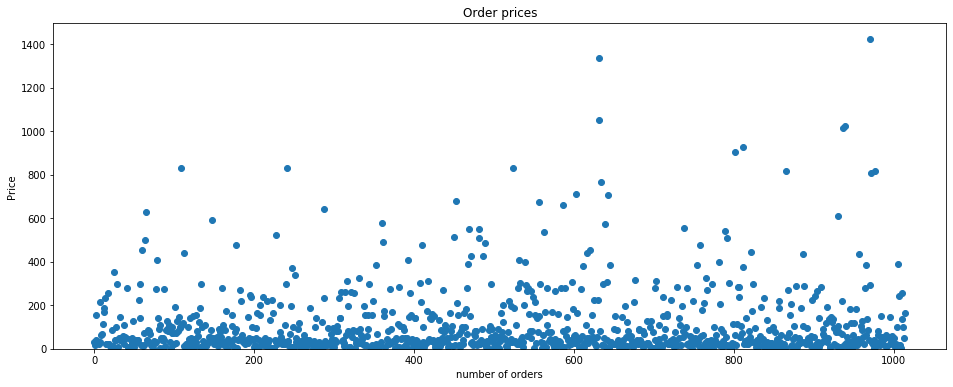

In [18]:
plt.figure(figsize=(16,6))
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.xlabel('number of orders')
plt.ylabel('Price')
plt.title('Order prices')
plt.ylim(0, 1500)
plt.show()

<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; border-style: dotted solid; vertical-align: middle; padding:20px 10px;">
According to the scatter chart (the range is already edited for the greater clarity), most order prices did not exceed 400,as a result the prices which are higher than 400 can be considered outliers and filtered out.
</div>

#### Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly. <a class="anchor" id="section_2_2_8"></a>

In [19]:
np.percentile(orders['revenue'], [95, 99])

array([414.275, 830.3  ])

<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; border-style: dotted solid; vertical-align: middle; padding:20px 10px;">
    The additional calculations of 95 and 99 percentiles prove the previous assumption regarding the outliers to be filtered out. 
</div>

#### Task 9: Find the statistical significance of the difference in conversion between the groups using the raw data <a class="anchor" id="section_2_2_9"></a>

<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; border-style: dotted solid; vertical-align: middle; padding:20px 10px;">
    
In order to make any conclusions regarding the differences in conversion rates between groups A and B I will run the Wilcoxon-Mann-Whitney Nonparametric test (due to the fact that the raw data contains big outliers)   
    
<p><strong>Null hypothesis</strong>: Conversion rates in groups A and B can be considered equal (the difference between the groups is statistically insignificant).</p> 
    
<p><strong>Alternative hypothesis</strong>: The difference in conversion rates between the groups A and B is statistically significant</p>
    
</div>

In [20]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.1%}".format(sampleB.mean()/sampleA.mean()-1))


0.00551
16.0%


In [22]:
sampleA

0        1
1        1
2        1
3        1
4        1
        ..
18286    0
18287    0
18288    0
18289    0
18290    0
Name: orders, Length: 18736, dtype: int64

<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; border-style: dotted solid; vertical-align: middle; padding:20px 10px;">
According to the analysis of raw data, the p-value is lower than 0.05, so we reject the null hypothesis and conclude that the groups' conversion rates have statistically significant differences. Moreover, the relative conversion gain for group B compared to group A is 16 percent.
</div>

#### Task 10: Find the statistical significance of the difference in average order size between the groups using the raw data <a class="anchor" id="section_2_2_10"></a>

<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; border-style: dotted solid; vertical-align: middle; padding:20px 10px;">
    
In order to make any conclusions regarding the differences in average order size between groups A and B I will run the Wilcoxon-Mann-Whitney Nonparametric test (due to the fact that the raw data contains big outliers)   
    
<p><strong>Null hypothesis</strong>: Average order size in groups A and B can be considered equal (the difference between the groups is statistically insignificant).</p> 
    
<p><strong>Alternative hypothesis</strong>: The difference in average order size between the groups A and B is statistically significant</p>
    
</div>

In [19]:
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("{0:.1%}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.431
27.8%


<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; border-style: dotted solid; vertical-align: middle; padding:20px 10px;">
According to the analysis of raw data, the p-value is higher than 0.05, so there is no statistically significant differences between the groups' average order size. Nonetheless, the average order size for group B is much bigger ( almost 28%) than it is for group A. 
</div>

#### Task 11: Find the statistical significance of the difference in conversion between the groups using the filtered data.  <a class="anchor" id="section_2_2_11"></a>

In [20]:

ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 1]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 1]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 400]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0) 


print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.1%}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.010
16.7%


<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; border-style: dotted solid; vertical-align: middle; padding:20px 10px;">
According to the analysis of the filtered data, the p-value is  also lower than 0.05, so we reject the null hypothesis and conclude that the groups' conversion rates have statistically significant differences (as well as in the case with the raw data). The relative conversion gain for group B compared to group A is 16,7 percent (similar to the raw data).
</div>

#### Task 12: Find the statistical significance of the difference in average order size between the groups using the filtered data  <a class="anchor" id="section_2_2_12"></a>

In [21]:
 

print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.1%}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.328
-5.8%


<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:left; border-style: dotted solid; vertical-align: middle; padding:20px 10px;">
According to the analysis of filtered data, the p-value is higher than 0.05, so there is no statistically significant differences between the groups' average order size. Nonetheless, the average order size for group B is smaller than it is for group A (in contrast to the results gained based on the raw data).That means that filtering out the outliers gave as an opportunity to decrease the amount of noise in the data and to see the real picture.  
</div>

### Conclusion <a class="anchor" id="chapter3"></a>

During the A/B test the following metrics were analysed: conversion rate and average order size. Additionally, the dynamics of the groups cumulative revenues were considered.
<p><strong>The major findings and conclusions:</strong>
<ol>
    <li>The cumulative revenues are increasing in both groups, however, starting from August 18th in the group B there is a sharp rise in revenues which is correlated with the rise of average order size. However, it is significant to mention that in average there is no statistically significant differences between the groups' average order size after filtering out the ouliers (extremely expensive orders). In this connection, one may conclude, that the dramatic jump in average order size in the group B can be explained by few high price orders, made after August 18th.</li>
    <li> Starting from August 6th - the conversion rate for the group B is higher than the one for the group A -  and the difference remains relatively stable till the end of the test astirting from August 9th. In general, the relative conversion gain for group B compared to group A is more than 16 percent.</li>
    <li>The results on conversion rates did not differ for raw and filtered data. However, the outliers do effect dramatically the results on average order size for both groups.</li>
    <li>The rise of revenues and of average order size (due to the high price orders) is extremely rapid in the group B near August 18th. I would suggest to explore in deep the additional data related to this period in order to get insights regarding the rapid change.</li></ol>
    
    
<strong>Based on the results of the test, I would suggest to stop the test and to consider the group B the leader. Despite the fact that there is no statistically significant differences between the groups' average order size (after filtering out the outliers), the cumulative revenue is much bigger than in the group A by the end of the test (the difference is more than 25000) and it continues to grow. Moreover, the relative conversion gain for group B compared to group A is more than 16 percent. </strong>
 